# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [17]:
# define the y' funciotn

def oscillator(t,y,K,M):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the initial condition y
        :param K: the spring constant
        :param M: the mass of the oscillator

        """

        #
        # TODO:
        #
        force = - K * y[0] # the force on the oscillator
        A = force/M        # the accerlation

        f = np.zeros(len(y)) # y' has the same dimension of y
        f[0] = y[1]
        f[1] = A
        return f
    

# Prepare the input arguments

t_span = (0, 10)
y0     = np.array([1,0])
t_eval = np.linspace(0,10,1000)

K = 1
M = 1

# use the IVP solver
sol = mysolver.solve_ivp(oscillator, t_span, y0, 
                    method="Euler",t_eval=t_eval, args=(K,M))

print("sol=",sol[0])
print("Done!")



sol= [ 1.00000000e+00  9.99899800e-01  9.99699399e-01  9.99398808e-01
  9.98998047e-01  9.98497146e-01  9.97896145e-01  9.97195094e-01
  9.96394054e-01  9.95493095e-01  9.94492296e-01  9.93391749e-01
  9.92191554e-01  9.90891820e-01  9.89492668e-01  9.87994229e-01
  9.86396642e-01  9.84700058e-01  9.82904637e-01  9.81010548e-01
  9.79017972e-01  9.76927099e-01  9.74738128e-01  9.72451268e-01
  9.70066739e-01  9.67584770e-01  9.65005601e-01  9.62329479e-01
  9.59556663e-01  9.56687422e-01  9.53722032e-01  9.50660782e-01
  9.47503969e-01  9.44251900e-01  9.40904890e-01  9.37463266e-01
  9.33927363e-01  9.30297526e-01  9.26574110e-01  9.22757477e-01
  9.18848001e-01  9.14846064e-01  9.10752059e-01  9.06566386e-01
  9.02289455e-01  8.97921686e-01  8.93463507e-01  8.88915356e-01
  8.84277680e-01  8.79550935e-01  8.74735584e-01  8.69832102e-01
  8.64840972e-01  8.59762684e-01  8.54597738e-01  8.49346645e-01
  8.44009920e-01  8.38588090e-01  8.33081691e-01  8.27491264e-01
  8.21817363e-01  8.

In [25]:
# visualize the results
plt.plot(t_eval,sol[0,:])



UsageError: Line magic function `%%timeit` not found.


# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

sol= [ 1.00000000e+00  9.99899800e-01  9.99699901e-01  9.99400812e-01
  9.99003050e-01  9.98507138e-01  9.97913608e-01  9.97222998e-01
  9.96435853e-01  9.95552726e-01  9.94574176e-01  9.93500768e-01
  9.92333077e-01  9.91071680e-01  9.89717165e-01  9.88270124e-01
  9.86731155e-01  9.85100864e-01  9.83379861e-01  9.81568765e-01
  9.79668198e-01  9.77678790e-01  9.75601176e-01  9.73435997e-01
  9.71183899e-01  9.68845535e-01  9.66421560e-01  9.63912640e-01
  9.61319440e-01  9.58642636e-01  9.55882904e-01  9.53040928e-01
  9.50117397e-01  9.47113003e-01  9.44028444e-01  9.40864423e-01
  9.37621645e-01  9.34300822e-01  9.30902671e-01  9.27427910e-01
  9.23877263e-01  9.20251459e-01  9.16551229e-01  9.12777309e-01
  9.08930439e-01  9.05011362e-01  9.01020825e-01  8.96959579e-01
  8.92828376e-01  8.88627974e-01  8.84359134e-01  8.80022618e-01
  8.75619194e-01  8.71149631e-01  8.66614700e-01  8.62015177e-01
  8.57351840e-01  8.52625468e-01  8.47836845e-01  8.42986756e-01
  8.38075988e-01  8.

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

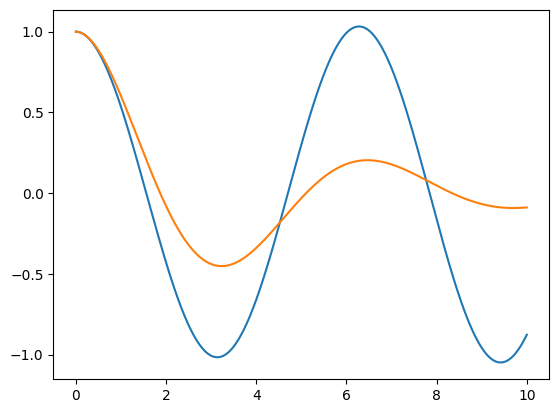

In [18]:
# TODO
def damped_oscillator(t,y,K,M,lamda):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the initial condition y
        :param K: the spring constant
        :param M: the mass of the oscillator

        """

        #
        # TODO:
        #
        force = - K * y[0]-lamda*y[1] # the force on the oscillator
        A = force/M        # the accerlation

        f = np.zeros(len(y)) # y' has the same dimension of y
        f[0] = y[1]
        f[1] = A
        return f
    

# Prepare the input arguments

t_span = (0, 10)
y0     = np.array([1,0])
t_eval = np.linspace(0,10,1000)

K = 1
M = 1
 lamda=0.5
# use the IVP solver
sol = mysolver.solve_ivp(damped_oscillator, t_span, y0, 
                    method="Euler",t_eval=t_eval, args=(K,M,lamda))

print("sol=",sol[0])
print("Done!")
plt.plot(t_eval,sol[0,:])
plt.hold(True)







### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

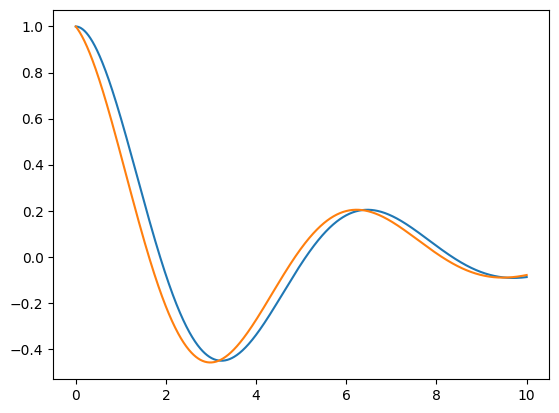

In [21]:
# Compute the analytical solution
import math
plt.plot(t_eval,sol[0,:])
A=1
gamma=lamda/(2*M)
omega=np.sqrt(K/M-gamma**2)

x=A*np.exp(-gamma*t_eval)*(np.cos(omega*t_eval))
plt.plot(t_eval,x)






## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

In [4]:
# TODO








# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [5]:
# TODO







# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [6]:
# TODO







# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [ ]:
# TODO







# Performance

We could mesure the performance of our solver and compare it with scipy.

In [7]:
#TODO







Which one is faster?